This example was adapted from skaae's Lasagne [recipe](https://github.com/skaae/Recipes/blob/spatial_transform/examples/spatial_transformer_network.ipynb).  
You can download skaae's Cluttered MNIST dataset [here](https://s3.amazonaws.com/lasagne/recipes/datasets/mnist_cluttered_60x60_6distortions.npz).
This ipython notebook was adapted from Seya's spatial transformer network example
(https://github.com/EderSantana/seya/blob/keras1/examples/Spatial%20Transformer%20Networks.ipynb)

Reference at [arXiv](http://arxiv.org/abs/1506.02025)

In [53]:
%matplotlib inline

import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from scipy.misc import imresize
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils import np_utils, generic_utils
from keras.optimizers import Adam, SGD

import keras.backend as K
from spatial_transformer import SpatialTransformer

batch_size = 128
nb_classes = 10
nb_epoch = 12

DIM = 60
dep
mnist_cluttered = "../datasets/mnist_cluttered_60x60_6distortions.npz"
# DIM = 40
# dep = 1
# mnist_cluttered = '../datasets/mnist_sequence1_sample_5distortions5x5.npz'

# DIM = 60
# dep = 3
# nb_classes = 13
# mnist_cluttered = '../datasets/train.npz'

In [55]:
data = np.load(mnist_cluttered)
# X_train, y_train = data['x_train'], data['y_train']
# X_valid, y_valid = data['x_valid'], data['y_valid']
# X_test, y_test = data['x_test'], data['y_test']
X_train, y_train = data['x_train'], np.argmax(data['y_train'], axis=-1)
X_valid, y_valid = data['x_valid'], np.argmax(data['y_valid'], axis=-1)
X_test, y_test = data['x_test'], np.argmax(data['y_test'], axis=-1)
# reshape for convolutions
X_train = X_train.reshape((X_train.shape[0], DIM, DIM, dep))
X_valid = X_valid.reshape((X_valid.shape[0], DIM, DIM, dep))
X_test = X_test.reshape((X_test.shape[0], DIM, DIM, dep))
print y_valid.shape
y_train = np_utils.to_categorical(y_train, nb_classes)
y_valid = np_utils.to_categorical(y_valid, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print y_valid.shape
print("Train samples: {}".format(X_train.shape))
print("Validation samples: {}".format(X_valid.shape))
print("Test samples: {}".format(X_test.shape))


input_shape =  np.squeeze(X_train.shape[1:])
input_shape = (DIM, DIM, dep)
print("Input shape:",input_shape)

ValueError: cannot reshape array of size 180000000 into shape (50000,60,60,3)

In [ ]:
plt.figure(figsize=(7,7))
if dep ==3:
    plt.imshow(X_train[101].reshape(DIM, DIM, dep), interpolation='none')
else:  
    plt.imshow(X_train[101].reshape(DIM, DIM), cmap='gray', interpolation='none')
plt.title('Cluttered MNIST', fontsize=20)
plt.axis('off')
plt.show()

In [46]:
# initial weights
b = np.zeros((2, 3), dtype='float32')
b[0, 0] = 1
b[1, 1] = 1
W = np.zeros((50, 6), dtype='float32')
weights = [W, b.flatten()]

In [47]:
locnet = Sequential()
locnet.add(MaxPooling2D(pool_size=(2,2), input_shape=input_shape))
locnet.add(Convolution2D(20, (5, 5)))
locnet.add(MaxPooling2D(pool_size=(2,2)))
locnet.add(Convolution2D(20, (5, 5)))

locnet.add(Flatten())
locnet.add(Dense(50))
locnet.add(Activation('relu'))
locnet.add(Dense(6, weights=weights))
#locnet.add(Activation('sigmoid'))

In [48]:
model = Sequential()

model.add(SpatialTransformer(localization_net=locnet,
                             output_size=(DIM/2,DIM/2), input_shape=input_shape))

model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [49]:
XX = model.input
YY = model.layers[0].output
F = K.function([XX], [YY])

In [50]:
print(X_train.shape[0]/batch_size)

75


----------------------------------------
Train on 9196 samples, validate on 484 samples
Epoch 1/1
9196/9196 [==============================] - 24s - loss: 1.1522 - acc: 0.7047 - val_loss: 0.5681 - val_acc: 0.8161


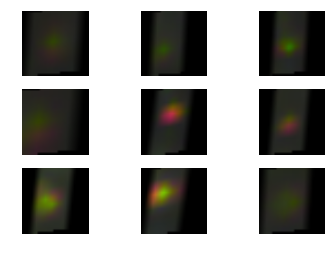

----------------------------------------
Train on 9196 samples, validate on 484 samples
Epoch 1/1
9196/9196 [==============================] - 23s - loss: 0.5588 - acc: 0.8198 - val_loss: 0.5085 - val_acc: 0.8471


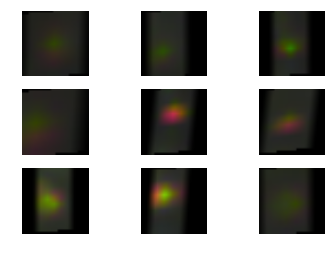

----------------------------------------
Train on 9196 samples, validate on 484 samples
Epoch 1/1
9196/9196 [==============================] - 25s - loss: 0.4743 - acc: 0.8445 - val_loss: 0.5680 - val_acc: 0.8450


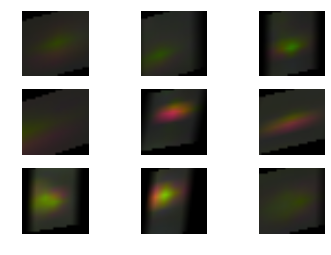

----------------------------------------
Train on 9196 samples, validate on 484 samples
Epoch 1/1
9196/9196 [==============================] - 24s - loss: 0.4420 - acc: 0.8509 - val_loss: 0.4797 - val_acc: 0.8574


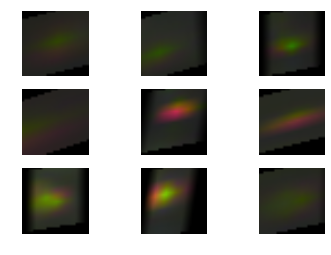

----------------------------------------
Train on 9196 samples, validate on 484 samples
Epoch 1/1
9196/9196 [==============================] - 24s - loss: 0.4160 - acc: 0.8631 - val_loss: 0.5283 - val_acc: 0.8430


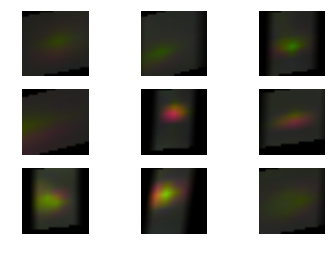

----------------------------------------
Train on 9196 samples, validate on 484 samples
Epoch 1/1
9196/9196 [==============================] - 25s - loss: 0.4149 - acc: 0.8614 - val_loss: 0.4504 - val_acc: 0.8595


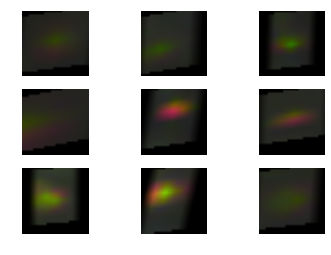

----------------------------------------
Train on 9196 samples, validate on 484 samples
Epoch 1/1
1792/9196 [====>.........................] - ETA: 23s - loss: 0.3757 - acc: 0.8739

In [51]:
nb_epochs = 10 # you probably want to go longer than this
batch_size = 256
fig = plt.figure()
try:
    for e in range(nb_epochs):
        print('-'*40)
        #progbar = generic_utils.Progbar(X_train.shape[0])
#         for b in range(150):
#             #print(b)
#             f = b * batch_size
#             l = (b+1) * batch_size
#             X_batch = X_train[f:l].astype('float32')
#             y_batch = y_train[f:l].astype('float32')
#             loss = model.train_on_batch(X_batch, y_batch)
#             #print(loss)
#             #progbar.add(X_batch.shape[0], values=[("train loss", loss)])
#         scorev = model.evaluate(X_valid, y_valid, verbose=1)
#         scoret = model.evaluate(X_test, y_test, verbose=1)
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, validation_split=0.05)
#         print('Epoch: {0} | Valid: {1} | Test: {2}'.format(e, scorev, scoret))
        
        if e % 1 == 0:
            Xresult = F([X_train[:9]])
            plt.clf()
            for i in range(9):
                plt.subplot(3, 3, i+1)
                image = np.squeeze(Xresult[0][i])
                if dep ==3:
                    plt.imshow(image)
                else:  
                    plt.imshow(image, cmap='gray')
                plt.axis('off')
            fig.canvas.draw()
            plt.show()
        
except KeyboardInterrupt:
    pass

### Visualizing what the Spatial Transformer learned

In [11]:
Xaug = X_train[:9]
Xresult = F([Xaug.astype('float32')])

# xx = Xaug.reshape([-1,60,60])
# xx = Xaug[0,:,:]
    
# for i in range(xx.shape[0]):
#     print xx[i,:]
 


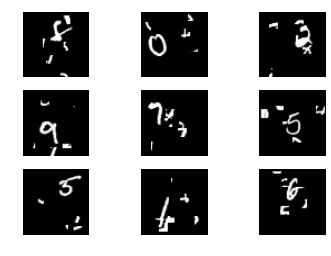

In [12]:
# input
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(Xaug[i]), cmap='gray')
    plt.axis('off')

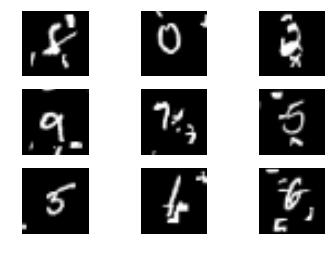

In [13]:
# output
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(Xresult[0][i]), cmap='gray')
    plt.axis('off')

In [36]:
%matplotlib inline

import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from scipy.misc import imresize
data = np.load('../datasets/train.npz')
X_train, y_train = data['x_train'], data['y_train']
X_valid, y_valid = data['x_valid'], data['y_valid']
X_test, y_test = data['x_test'], data['y_test']
x = X_train[0,:,:,:]
y = y_train
print y.shape
# for i in range(60):
#     print x[i,:,:]



(9680, 1)
